# Analiza podatkov s knjižnico Pandas

Spodaj je pregled najosnovnejših metod, ki jih ponuja knjižnica Pandas. Vsaka od naštetih metod ponuja še cel kup dodatnih možnosti, ki so natančno opisane v [uradni dokumentaciji](http://pandas.pydata.org/pandas-docs/stable/). Z branjem dokumentacije se vam seveda najbolj splača začeti pri [uvodih](http://pandas.pydata.org/pandas-docs/stable/tutorials.html).

## Predpriprava

In [3]:
# naložimo paket
import pandas as pd

# naložimo razpredelnico, s katero bomo delali
filmi = pd.read_csv('obdelani-podatki/filmi.csv', index_col='id')

# ker bomo delali z velikimi razpredelnicami, povemo, da naj se vedno izpiše le 20 vrstic
pd.options.display.max_rows = 20

## Osnovni izbori elementov razpredelnic

Z metodo `.head(n=5)` pogledamo prvih `n`, z metodo `.tail(n=5)` pa zadnjih `n` vrstic razpredelnice.

In [ ]:
filmi.head(10)

In [ ]:
filmi.tail()

Z rezinami pa dostopamo do izbranih vrstic.

In [ ]:
filmi[3:10:2]

Z indeksiranjem razpredelnice dostopamo do posameznih stolpcev.

In [ ]:
filmi['ocena']

Do stolpcev pogosto dostopamo, zato lahko uporabimo tudi krajši zapis.

In [ ]:
filmi.ocena

Če želimo več stolpcev, moramo za indeks podati seznam vseh oznak.

In [ ]:
filmi[['naslov', 'ocena']]

Do vrednosti z indeksom `i` dostopamo z `.iloc[i]`, do tiste s ključem `k` pa z `.loc[k]`.

In [ ]:
filmi.iloc[120]

In [ ]:
filmi.loc[97576]

## Filtriranje

Izbor določenih vrstic razpredelnice naredimo tako, da za indeks podamo stolpec logičnih vrednosti, ki ga dobimo z običajnimi operacijami. V vrnjeni razpredelnici bodo ostale vrstice, pri katerih je v stolpcu vrednost `True`.

In [ ]:
filmi.ocena >= 8

In [ ]:
filmi[filmi.ocena >= 8]

In [ ]:
filmi[(filmi.leto > 2010) & (filmi.ocena > 8)]

### Naloga

Poiščite filme, ki si jih želimo izogniti za vsako ceno, torej tiste, ki so daljši od dveh ur in imajo oceno pod 6.5.

In [ ]:
filmi[(filmi.ocena < 6) & (filmi.dolzina > 150)]

## Urejanje

Razpredelnico urejamo z metodo `.sort_values`, ki ji podamo ime ali seznam imen stolpcev, po katerih želimo urejati. Po želji lahko tudi povemo, kateri stolpci naj bodo urejeni naraščajoče in kateri padajoče.

In [ ]:
filmi.sort_values('dolzina')

In [ ]:
# najprej uredi padajoče po oceni, pri vsaki oceni pa še naraščajoče po letu
filmi.sort_values(['ocena', 'leto'], ascending=[False, True])

## Združevanje

Z metodo `.groupby` ustvarimo razpredelnico posebne vrste, v katerem so vrstice združene glede na skupno lastnost.

In [4]:
filmi_po_letih = filmi.groupby('leto')

In [5]:
filmi_po_letih

In [6]:
# povprečna ocena vsakega leta
filmi_po_letih.ocena.mean()

leto
1921    8.300000
1922    8.000000
1925    8.200000
1926    8.200000
1927    8.300000
1931    8.450000
1933    7.900000
1934    8.100000
1936    8.500000
1937    7.600000
          ...   
2009    6.725893
2010    6.699130
2011    6.675000
2012    6.811215
2013    6.786047
2014    6.883333
2015    6.844944
2016    6.896154
2017    6.879710
2018    7.050000
Name: ocena, Length: 87, dtype: float64

Če želimo, lahko združujemo tudi po izračunanih lastnostih. Izračunajmo stolpec in ga shranimo v razpredelnico.

In [8]:
filmi['desetletje'] = 10 * (filmi.leto // 10)

In [9]:
filmi

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis,desetletje
id,,,,,,,,,
12349,The Kid,68,1921,8.3,NaN,90443,5450000.0,"The Tramp cares for an abandoned child, but ev...",1920
13442,"Nosferatu, simfonija groze",94,1922,8.0,NaN,77975,NaN,Vampire Count Orlok expresses interest in a ne...,1920
15864,Zlata mrzlica,95,1925,8.2,NaN,85136,5450000.0,A prospector goes to the Klondike in search of...,1920
17136,Metropolis,153,1927,8.3,98.0,136601,26435.0,In a futuristic city sharply divided between t...,1920
17925,General,67,1926,8.2,NaN,68196,NaN,When Union spies steal an engineer's beloved l...,1920
21749,Luči velemesta,87,1931,8.5,NaN,138228,19181.0,"With the aid of a wealthy erratic tippler, a d...",1930
22100,M - mesto isce morilca,117,1931,8.4,NaN,121443,28877.0,When the police in a German city are unable to...,1930
24216,King Kong,100,1933,7.9,90.0,71806,10000000.0,A film crew goes to a tropical island for an e...,1930
25316,Zgodilo se je neke noci,105,1934,8.1,87.0,81390,NaN,A spoiled heiress running away from her family...,1930


In [10]:
filmi_po_desetletjih = filmi.groupby('desetletje')

Preštejemo, koliko filmov je bilo v vsakem desetletju. Pri večini stolpcev dobimo iste številke, ker imamo v vsakem stolpcu enako vnosov. Če kje kakšen podatek manjkal, je številka manjša.

In [17]:
filmi_po_desetletjih.count()

,naslov,dolzina,leto,ocena,metascore,glasovi,zasluzek,opis
desetletje,,,,,,,,
1920,5,5,5,5,1,5,3,5
1930,9,9,9,9,7,9,8,9
1940,18,18,18,18,10,18,13,18
1950,35,35,35,35,19,35,22,35
1960,47,47,47,47,34,47,36,47
1970,64,64,64,64,61,64,56,64
1980,164,164,164,164,154,164,158,164
1990,396,396,396,396,375,396,395,396
2000,899,899,899,899,882,899,882,899


Če želimo dobiti le število članov posamezne skupine, uporabimo metodo `.size()`. V tem primeru dobimo le stolpec, ne razpredelnice.

In [19]:
filmi_po_desetletjih.size()

desetletje
1920      5
1930      9
1940     18
1950     35
1960     47
1970     64
1980    164
1990    396
2000    899
2010    863
dtype: int64

Pogledamo povprečja vsakega desetletja. Dobimo povprečno leto, povprečno dolžino in oceno. Povprečnega naslova ne dobimo, ker se ga ne da izračunati, zato ustreznega stolpca ni.

In [20]:
filmi_po_desetletjih.mean()

,dolzina,leto,ocena,metascore,glasovi,zasluzek
desetletje,,,,,,
1920,95.400000,1924.200000,8.200000,98.000000,91670.200000,3.642145e+06
1930,116.444444,1935.444444,8.155556,91.142857,159804.555556,5.320198e+07
1940,105.722222,1943.444444,8.072222,94.400000,154435.388889,2.284421e+07
1950,109.057143,1954.600000,8.077143,93.473684,149282.514286,2.592219e+07
1960,127.872340,1964.425532,7.891489,81.088235,157029.000000,4.477990e+07
1970,120.046875,1975.281250,7.768750,77.901639,230599.203125,6.823634e+07
1980,111.939024,1985.414634,7.420732,64.902597,181266.146341,7.153909e+07
1990,115.957071,1995.535354,7.059596,61.584000,210144.161616,7.800289e+07
2000,112.181313,2005.040044,6.818576,57.904762,200504.091212,7.656505e+07


### Naloga

Izračunajte število filmov posamezne dolžine, zaokrožene na 5 minut.

## Risanje grafov

In [12]:
# vključimo risanje grafov (če stvari začnejo delati počasneje, izklopimo možnost inline)
%matplotlib inline

Običajen graf dobimo z metodo `plot`. Uporabljamo ga, kadar želimo prikazati spreminjanje vrednosti v odvisnosti od zvezne spremenljivke. Naša hipoteza je, da so zlata leta filma mimo. Graf to potrjuje.

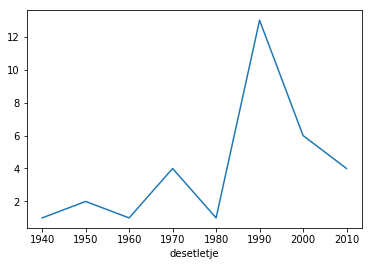

In [13]:
filmi[filmi.ocena > 8.5].groupby('desetletje').size().plot()

Razsevni diagram dobimo z metodo `plot.scatter`. Uporabljamo ga, če želimo ugotoviti povezavo med dvema spremenljivkama.

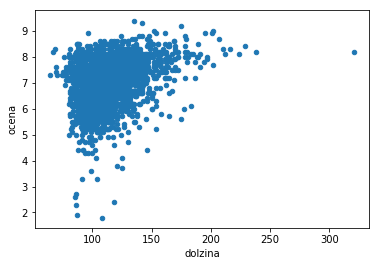

In [14]:
filmi.plot.scatter('dolzina', 'ocena')

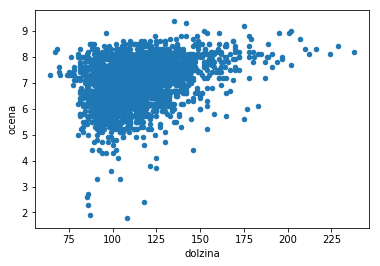

In [15]:
filmi[filmi.dolzina < 250].plot.scatter('dolzina', 'ocena')

Stolpčni diagram dobimo z metodo `plot.bar`. Uporabljamo ga, če želimo primerjati vrednosti pri diskretnih (običajno kategoričnih) spremenljivkah. Pogosto je koristno, da graf uredimo po vrednostih.

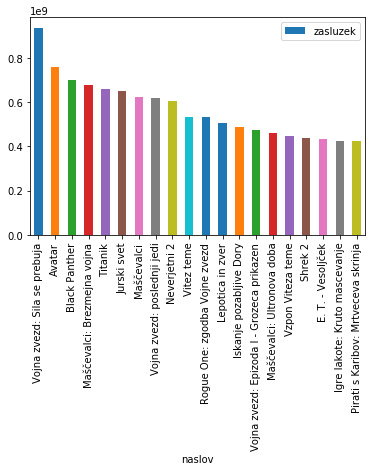

In [18]:
filmi.sort_values('zasluzek', ascending=False).head(20).plot.bar(x='naslov', y='zasluzek')

### Naloga

Narišite grafe, ki ustrezno kažejo:
- Povezavo med IMDB in metascore oceno
- Spreminjanje povprečne dolžine filmov skozi leta

## Stikanje

In [ ]:
osebe = pd.read_csv('obdelani-podatki/osebe.csv', index_col='id')
vloge = pd.read_csv('obdelani-podatki/vloge.csv')
zanri = pd.read_csv('obdelani-podatki/zanri.csv')

Razpredelnice stikamo s funkcijo `merge`, ki vrne razpredelnico vnosov iz obeh tabel, pri katerih se vsi istoimenski podatki ujemajo.

In [ ]:
vloge[vloge.film == 12349]

In [ ]:
zanri[zanri.film == 12349]

In [ ]:
pd.merge(vloge, zanri).head(20)

V osnovi vsebuje staknjena razpredelnica le tiste vnose, ki se pojavijo v obeh tabelah. Temu principu pravimo notranji stik (_inner join_). Lahko pa se odločimo, da izberemo tudi tiste vnose, ki imajo podatke le v levi tabeli (_left join_), le v desni tabeli (_right join_) ali v vsaj eni tabeli (_outer join_). Če v eni tabeli ni vnosov, bodo v staknjeni tabeli označene manjkajoče vrednosti. Ker smo v našem primeru podatke jemali iz IMDBja, kjer so za vsak film določeni tako žanri kot vloge, do razlik ne pride.

Včasih želimo stikati tudi po stolpcih z različnimi imeni. V tem primeru funkciji `merge` podamo argumenta `left_on` in `right_on`.

In [ ]:
pd.merge(pd.merge(vloge, zanri), osebe, left_on='oseba', right_on='id')

Poglejmo, katera osebe so nastopale v največ komedijah.

In [ ]:
zanri_oseb = pd.merge(pd.merge(vloge, zanri), osebe, left_on='oseba', right_on='id')
zanri_oseb[
    (zanri_oseb.zanr == 'Comedy') &
    (zanri_oseb.vloga == 'igralec')
].groupby(
    'ime'
).size(
).sort_values(
    ascending=False
).head(20)

### Naloga

- Izračunajte povprečno oceno vsakega žanra.
- Kateri režiserji snemajo najdonosnejše filme?

## Zahtevnejši primer: naivni Bayesov klasifikator

Zanima nas, ali lahko iz opisa filma napovemo njegove žanre. Gre za _klasifikacijski problem_, saj želimo filme klasificirati v žanre, naša naloga pa je napisati ustrezen program, ki mu pravimo _klasifikator_. Da zadevo naredimo bolj obvladljivo, bomo opis predstavili le z množico korenov besed, ki se v opisu pojavljajo.

In [ ]:
def koren_besede(beseda):
    beseda = ''.join(znak for znak in beseda if znak.isalpha())
    if not beseda:
        return '$'
    konec = len(beseda) - 1
    if beseda[konec] in 'ds':
        konec -= 1
    while konec >= 0 and beseda[konec] in 'aeiou':
        konec -= 1
    return beseda[:konec + 1]

def koreni_besed(niz):
    return {
        koren_besede(beseda) for beseda in niz.replace('-', ' ').lower().split() if beseda
    }

In [ ]:
koreni_besed("In 1938, after his father Professor Henry Jones, Sr. goes missing while pursuing the Holy Grail, Indiana Jones finds himself up against Adolf Hitler's Nazis again to stop them obtaining its powers.")

Zanimala nas bo torej verjetnost, da ima film žanr $Ž_i$ ob pogoju, da njegov opis vsebuje korene $K_1, \ldots, K_m$, torej

$$P(Ž_i | K_1 \cap \cdots \cap K_n)$$

Pri tem se bomo poslužili Bayesovega izreka

$$P(A | B) = \frac{P(A \cap B)}{P(B)} = \frac{P(B | A) \cdot P(A)}{P(B)}$$

zaradi česar našemu klasifikatorju pravimo _Bayesov klasifikator_. Velja

$$P(Ž_i | K_1 \cap \cdots \cap K_n) = \frac{P(K_1 \cap \cdots \cap K_n | Ž_i) \cdot P(Ž_i)}{P(K_1 \cap \cdots \cap K_n)}$$

Nadalje si nalogo poenostavimo s predpostavko, da so pojavitve besed med seboj neodvisne. To sicer ni res, na primer ob besedi _treasure_ se bolj pogosto pojavlja beseda _hidden_ kot na primer _boring_, zato pravimo, da je klasifikator _naiven_. Ob tej predpostavki velja:

$$P(K_1 \cap \cdots \cap K_n | Ž_i) = P(K_1 | Ž_i) \cdot \cdots \cdot P(K_n | Ž_i)$$

oziroma

$$P(Ž_i | K_1 \cap \cdots \cap K_n) = \frac{P(K_1 | Ž_i) \cdot \cdots \cdot P(K_n | Ž_i) \cdot P(Ž_i)}{P(K_1 \cap \cdots \cap K_n)}$$

Filmu, katerega opis vsebuje korene $K_1, \dots, K_n$ bomo priredili tiste žanre $Ž_i$, pri katerih je dana verjetnost največja. Ker imenovalec ni odvisen od žanra, moramo torej za vsak $Ž_i$ izračunati le števec:

$$P(K_1 | Ž_i) \cdot \cdots \cdot P(K_n | Ž_i) \cdot P(Ž_i)$$

Vse te podatke znamo izračunati, zato se lahko lotimo dela.

Verjetnost posameznega žanra $P(Ž)$ izračunamo brez večjih težav:

In [ ]:
verjetnosti_zanrov = zanri.groupby('zanr').size() / len(filmi)
verjetnosti_zanrov

Verjetnosti $P(K|Ž)$ bomo shranili v razpredelnico, v kateri bodo vrstice ustrezale korenom $K$, stolpci pa žanrom $Ž$. Najprej moramo poiskati vse filme, ki imajo žanr $Ž$, njihov opis pa vsebuje koren $K$. Vzemimo vse opise filmov:

In [ ]:
filmi.opis

To vrsto nizov pretvorimo v vrsto množic besed. Uporabimo metodo `apply`, ki dano funkcijo uporabi na vsakem vnosu.

In [ ]:
filmi.opis.apply(
    koreni_besed
)

Po nekaj [iskanja po internetu](https://stackoverflow.com/questions/30885005/pandas-series-of-lists-to-one-series) in masiranja pridemo do iskane razpredelnice:

In [ ]:
koreni_filmov = filmi.opis.apply(
    koreni_besed
).apply(
    list
).apply(
    pd.Series
).stack(
).reset_index(
    level='id'
).rename(columns={
    'id': 'film',
    0: 'koren',
})
koreni_filmov

Razpredelnico združimo z razpredelnico žanrov, da dobimo razpredelnico korenov žanrov.

In [ ]:
koreni_zanrov = pd.merge(
    koreni_filmov,
    zanri
)[['koren', 'zanr']]
koreni_zanrov

S pomočjo funkcije `crosstab` preštejemo, kolikokrat se vsaka kombinacija pojavi.

In [ ]:
pojavitve_korenov_po_zanrih = pd.crosstab(koreni_zanrov.koren, koreni_zanrov.zanr)
pojavitve_korenov_po_zanrih

Iskane verjetnosti sedaj dobimo tako, da vsak stolpec delimo s številom filmov danega žanra. Da ne bomo dobili ničelne verjetnosti pri korenih, ki se v našem vzorcu ne pojavijo, verjetnost malenkost povečamo.

In [ ]:
verjetnosti_korenov_po_zanrih = pojavitve_korenov_po_zanrih / zanri.groupby('zanr').size() + 0.001

Poglejmo, kaj so najpogostejši koreni pri nekaj žanrih:

In [ ]:
verjetnosti_korenov_po_zanrih.Crime.sort_values(ascending=False).head(20)

In [ ]:
verjetnosti_korenov_po_zanrih.Romance.sort_values(ascending=False).head(20)

In [ ]:
verjetnosti_korenov_po_zanrih['Sci-Fi'].sort_values(ascending=False).head(20)

Žanre sedaj določimo tako, da za vsak žanr pomnožimo verjetnost žanra in pogojne verjetnosti vseh korenov, ki nastopajo v opisu filma.

In [ ]:
def doloci_zanre(opis):
    faktorji_zanrov = verjetnosti_zanrov * verjetnosti_korenov_po_zanrih[
        verjetnosti_korenov_po_zanrih.index.isin(
            koreni_besed(opis)
        )
    ].prod()
    faktorji_zanrov /= max(faktorji_zanrov)
    return faktorji_zanrov.sort_values(ascending=False).head(5)

In [ ]:
doloci_zanre('Alien space ship appears above Slovenia.')

In [ ]:
doloci_zanre('A story about a young mathematician, who discovers her artistic side')